# Google Play Store Apps Data

#### An overview, visualizations and rating prediction using various the various features

1. [Overview of Features](#Overview-of-Features)
2. [Data Visualization](#Data-Visualization)
3. [Data Cleaning](#Data-Cleaning) 
4. [Creating Dummy Variables](#Creating-Dummy-Variables)
5. [Feature Scaling and Selection](#Feature-Scaling-and-Selection)
6. [Training and Testing](#Training-and-Testing) 
7. [Model Comparisons](#Model-Comparison)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
%matplotlib inline

In [2]:
# load csv 
data = pd.read_csv('../datasets/googleplaystore.csv')

In [3]:
# show first 3 rows
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [4]:
# get shape of dataset
data.shape

(10841, 13)

In [5]:
# show columns of data
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
# show info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
# get count of empty data
data.isnull().sum()

# rating column has many missing values ~ can fill those with average values or remove those rows

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Overview of Features

In [8]:
# get an overview of feature correlation
data.groupby('Category',as_index=False)['Rating'].mean().head()

,Category,Rating
0,1.9,19.000000
1,ART_AND_DESIGN,4.358065
2,AUTO_AND_VEHICLES,4.190411
3,BEAUTY,4.278571
4,BOOKS_AND_REFERENCE,4.346067


In [9]:
for column in data.columns[3:]:
    print(((data.groupby(column)['Rating'].mean()).head(10)),end='\n\n')

Reviews
0               NaN
1          4.179104
10         4.250000
100        4.200000
1000417    4.300000
10006      3.100000
100082     4.900000
100130     4.300000
100179     4.100000
1002       4.400000
Name: Rating, dtype: float64

Size
1,000+    19.000000
1.0M       3.675000
1.1M       4.168000
1.2M       4.120000
1.3M       3.988889
1.4M       4.012000
1.5M       4.176316
1.6M       4.158065
1.7M       4.207143
1.8M       4.015385
Name: Rating, dtype: float64

Installs
0                      NaN
0+                     NaN
1+                5.000000
1,000+            4.066760
1,000,000+        4.220862
1,000,000,000+    4.258621
10+               4.624638
10,000+           4.039703
10,000,000+       4.313419
100+              4.363430
Name: Rating, dtype: float64

Type
0       19.000000
Free     4.186203
Paid     4.266615
Name: Rating, dtype: float64

Price
$0.99    4.298131
$1.00    4.450000
$1.04         NaN
$1.20    4.200000
$1.26         NaN
$1.29    4.100000
$1.49    4.1967

# Data Visualization

## Type vs Count

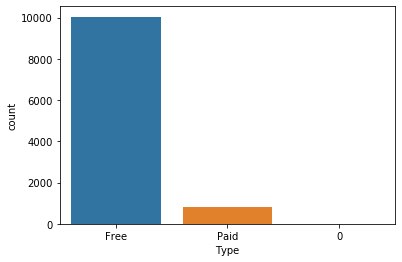

In [10]:
sns.countplot(x='Type',data=data)

### Type vs Rating

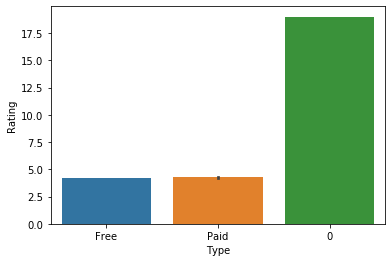

In [11]:
sns.barplot(x='Type', y='Rating', data=data)

### Content rating vs Rating grouped by Type

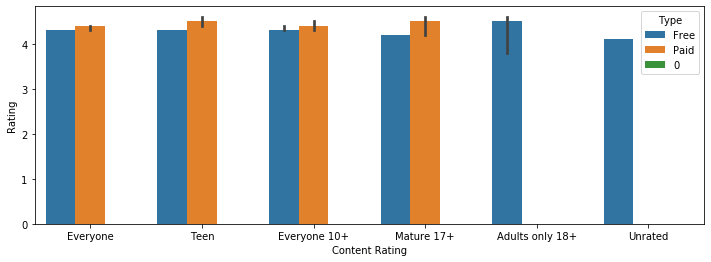

In [12]:
plt.figure(figsize=(12,4))
sns.barplot(x='Content Rating', y='Rating', hue='Type', data=data, estimator=np.median)

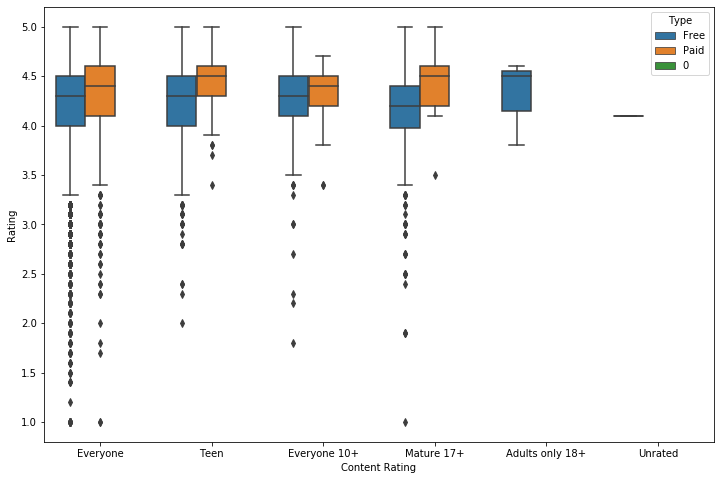

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Content Rating', y='Rating', hue="Type", data=data)

### Count of each Category

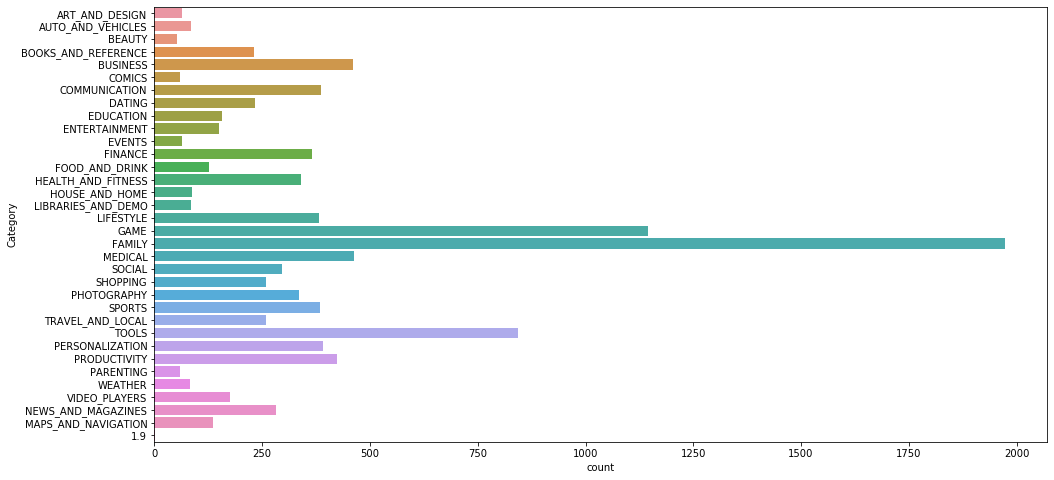

In [14]:
plt.figure(figsize=(16,8))
sns.countplot(y='Category',data=data)

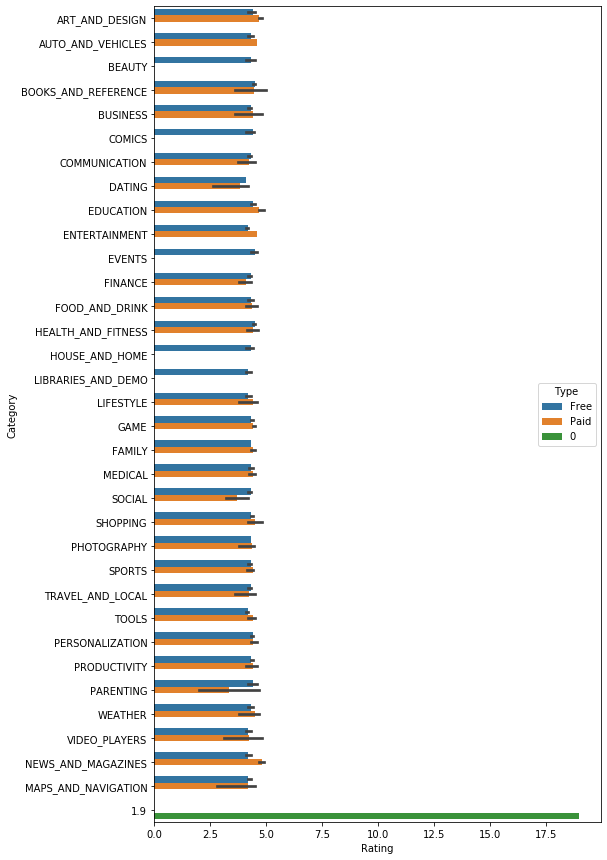

In [15]:
plt.figure(figsize=(8,15))
sns.barplot(y='Category', x='Rating', hue="Type", data=data, estimator=np.median)

### Content Rating

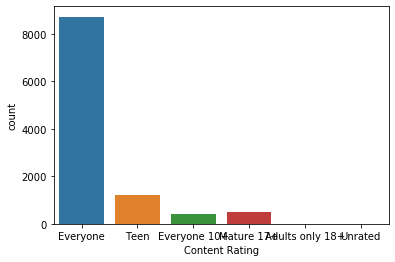

In [16]:
sns.countplot(x='Content Rating',data=data)

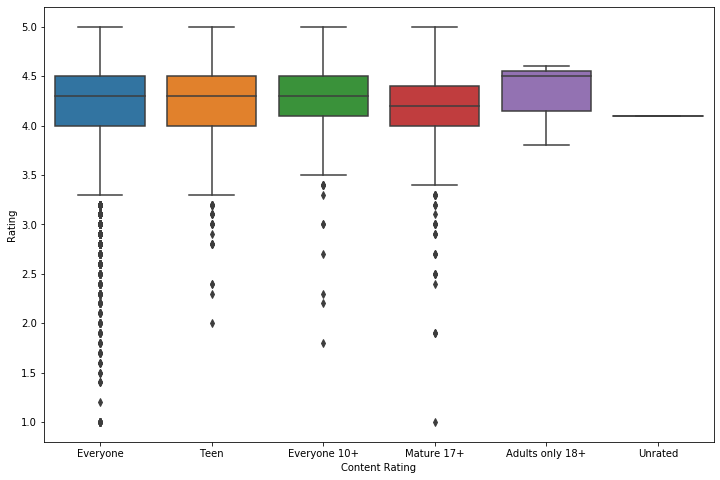

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Content Rating', y='Rating', data=data)

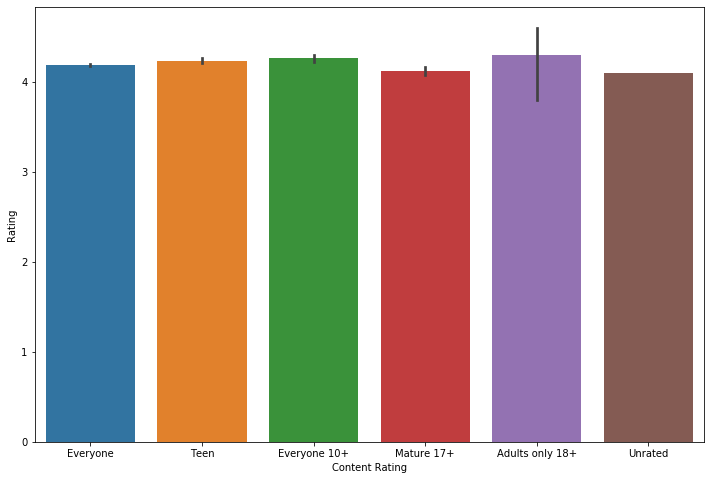

In [18]:
plt.figure(figsize=(12,8))
sns.barplot(x='Content Rating', y='Rating', data=data)

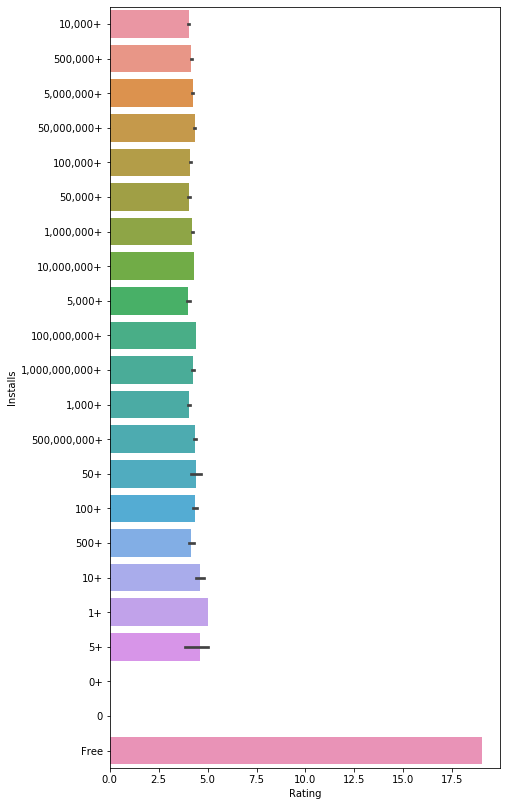

In [19]:
plt.figure(figsize=(7,14))
sns.barplot(y='Installs', x='Rating', data=data)

### Android Version

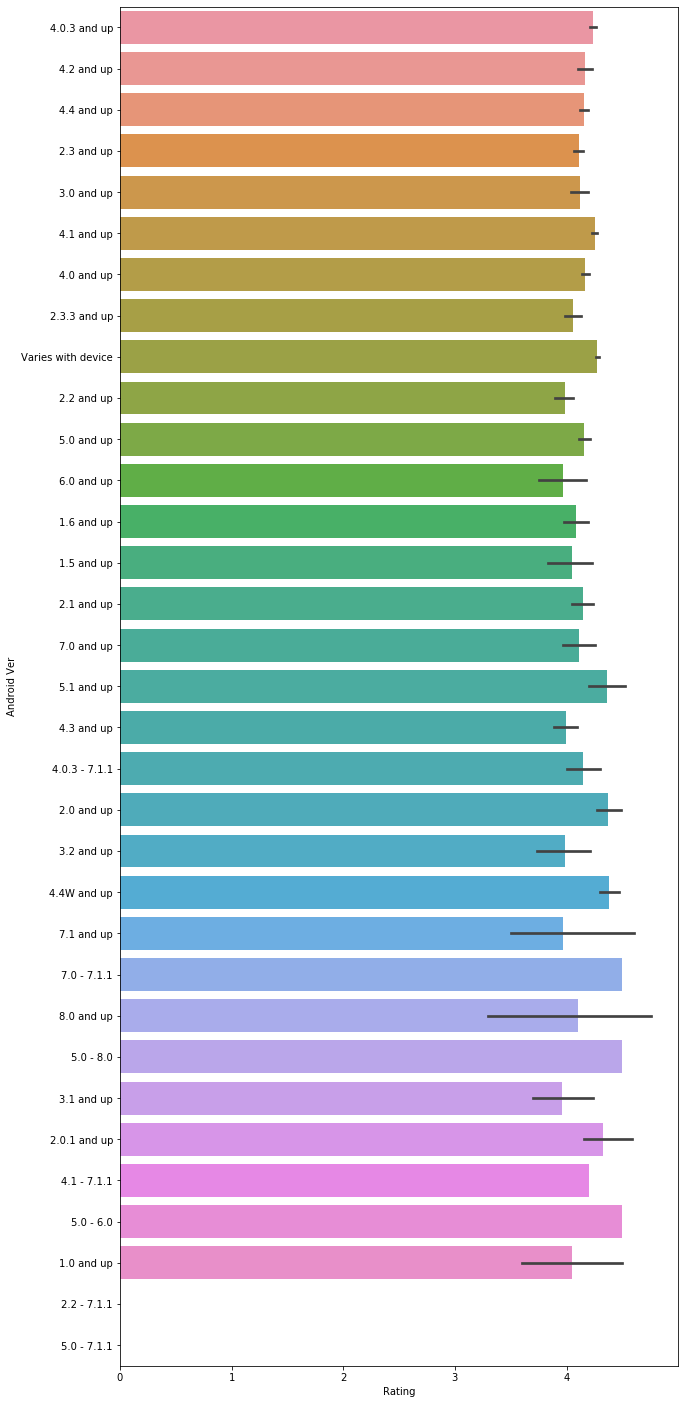

In [20]:
plt.figure(figsize=(10, 25))
sns.barplot(y='Android Ver', x='Rating', data=data)

### Rating

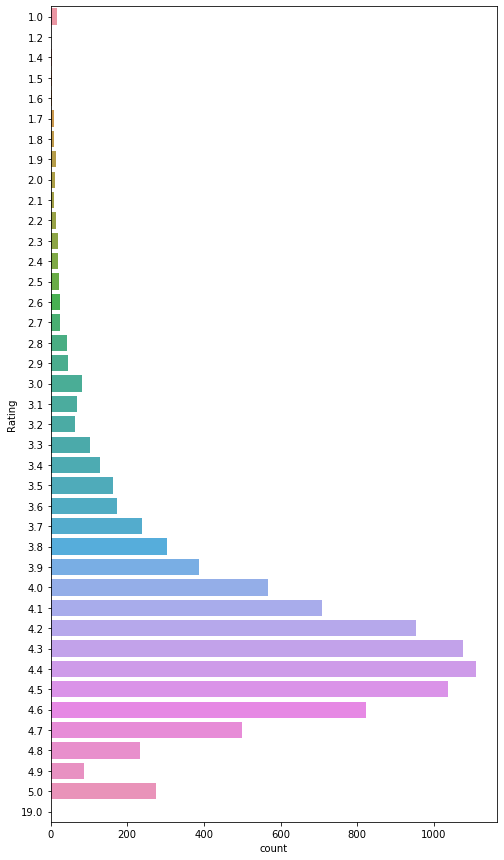

In [21]:
plt.figure(figsize=(8, 15))
sns.countplot(y='Rating',data=data)

An app has rating of 19 -- Maximum rating in the Play Store is 5; this is an anomaly

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C6FF069D08>]],
      dtype=object)

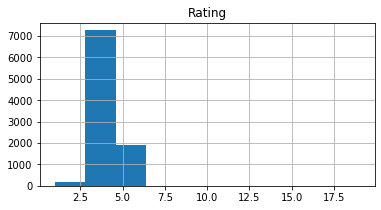

In [22]:
data.hist(figsize=(6,3))

# Data Cleaning

In [23]:
# Investigate the app with 19 rating
data[data['Rating']==19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [24]:
# Compare it with nearby data
data[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


In [25]:
# Shift the row to the right from column 1
data.iloc[10472,1:] = data.iloc[10472,1:].shift(1)
data[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


In [26]:
# Get count of rows with null values
data.isnull().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [27]:
# Total count of null values
data.isnull().sum().sum()

1487

In [28]:
total=data.isnull().sum()
percent = (data.isnull().sum()/data.isnull().count())
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'], sort=True)
missing_data.head(13)

,Total,Percent
Android Ver,2,0.000184
App,0,0.000000
Category,1,0.000092
Content Rating,0,0.000000
Current Ver,8,0.000738
Genres,1,0.000092
Installs,0,0.000000
Last Updated,0,0.000000
Price,0,0.000000
Rating,1474,0.135965


In [29]:
# Drop null value rows from DataFrame
data.dropna(inplace=True)

In [30]:
data.shape
# After removing null valued data, we're left with 9360 rows

(9360, 13)

# Creating Dummy Variables

In [31]:
# Certain predictors are discrete valued, therefore we need dummy variables for regression analysis
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [32]:
# Get dummy variables and replace the columns

catgry=pd.get_dummies(data['Category'],prefix='catg',drop_first=True)
typ=pd.get_dummies(data['Type'],prefix='typ',drop_first=True)
cr=pd.get_dummies(data['Content Rating'],prefix='cr',drop_first=True)
dummy_features=[data,catgry,typ,cr]
data=pd.concat(dummy_features,axis=1)
data.drop(['Category','Installs','Type','Content Rating'],axis=1,inplace=True)


In [33]:
# Drop the columns which are unrequired in regression analysis
data.drop(['App','Size','Price','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [34]:
data.head(3)

,Rating,Reviews,catg_AUTO_AND_VEHICLES,catg_BEAUTY,catg_BOOKS_AND_REFERENCE,catg_BUSINESS,catg_COMICS,catg_COMMUNICATION,catg_DATING,catg_EDUCATION,...,catg_TOOLS,catg_TRAVEL_AND_LOCAL,catg_VIDEO_PLAYERS,catg_WEATHER,typ_Paid,cr_Everyone,cr_Everyone 10+,cr_Mature 17+,cr_Teen,cr_Unrated
0,4.1,159,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,967,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,87510,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Feature Scaling and Selection
Many features have different scales and therefore need to be normalized/rescaled so that gradient descent can run optimally for various regression algorithms

In [35]:
# Rating will be predicted with all other features as predictors
X = data.drop('Rating', axis=1)
y = data['Rating'].values

In [36]:
# Split the dataset into 80% training and 20% testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
# Perform feature scaling so that each feature has mean 0 and standard deviation 1
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

# Training and Testing 

## *Linear Regression*

LinearRegression rsquared: 0.035910449674601
LinearRegression rsquared: 0.036694162504700145


TypeError: No loop matching the specified signature and casting
was found for ufunc lstsq_n

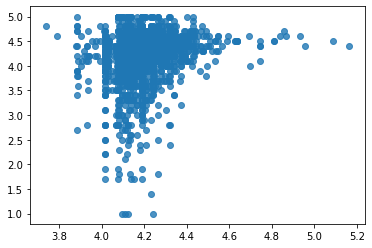

In [50]:
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

y = data['Rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_r = LinearRegression().fit(X_train, y_train)
lin_pred = lin_r.predict(X_test)
print('LinearRegression rsquared:', r2_score(y_test, lin_pred))

# As seen, linear regression performs poorly, 
# try polynomial regression 

poly = PolynomialFeatures(degree=2)
X_train_p = poly.fit_transform(X_train)
X_test_p = poly.fit_transform(X_test)
lin_r_p = LinearRegression().fit(X_train_p, y_train)
poly_pred = lin_r_p.predict(X_test_p)
print('LinearRegression rsquared:', r2_score(y_test, poly_pred))

sns.regplot(poly_pred, y_test, order=2)

## *Logistic Regression*

In [ ]:
# Change Ratings to integers
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


lr_c=LogisticRegression(solver='lbfgs', multi_class='auto', random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('LogisticRegression_accuracy:',lr_ac)

In [ ]:
plt.figure(figsize=(10,7))
plt.title("lr_cm")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

## *Decision Tree*

In [ ]:
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_test)

In [ ]:
plt.figure(figsize=(10,5))
plt.title("dtree_cm")
sns.heatmap(dtree_cm,annot=True,fmt="d",cbar=False)
print('DecisionTree_Classifier_accuracy:',dtree_ac)

## *SVM Regressor*

In [ ]:
svc_r=SVC(kernel='rbf', gamma='scale')
svc_r.fit(X_train,y_train)
svr_pred=svc_r.predict(X_test)
svr_cm=confusion_matrix(y_test,svr_pred)
svr_ac=accuracy_score(y_test, svr_pred)

In [ ]:
plt.figure(figsize=(10,5))
plt.title("svm_cm")
sns.heatmap(svr_cm,annot=True,cmap="Oranges",fmt="d",cbar=False)
print('SVM_regressor_accuracy:',svr_ac)

## *Random Forest Classification*

In [ ]:
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

In [ ]:
plt.figure(figsize=(10,5))
plt.title("rdf_cm")
sns.heatmap(rdf_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
print('RandomForest_accuracy:',rdf_ac)

# Model Comparison

In [ ]:
model_accuracy = pd.Series(data=[lr_ac,dtree_ac,svr_ac,rdf_ac], 
        index=['Logistic Regression','Decision Tree','SVM','Random Forest'])
fig = plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')